In [1]:
from os.path import abspath, sep, pardir
import sys
sys.path.append(abspath('') + sep + pardir + sep )
import MPL_style

In [2]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]
pwd_p=abspath('')
idxs=find(pwd_p, sep)
path_GIT=pwd_p[:idxs[-2]] + sep

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.io as sio

summary_wo_noise_2palg.mat
summary_2palg_precisionaddnoise_S1e-01.mat
summary_2palg_precisionround_S1e-01.mat
summary_2palg_precisionfull_S1e-01.mat
summary_w_noise_2palg.mat

In [4]:
isim=1  #index for network instance

### plot original connectivity matrix

In [6]:
W_orig=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01wo_noise_I{}.mat".format(isim))["adjacency"]


In [7]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

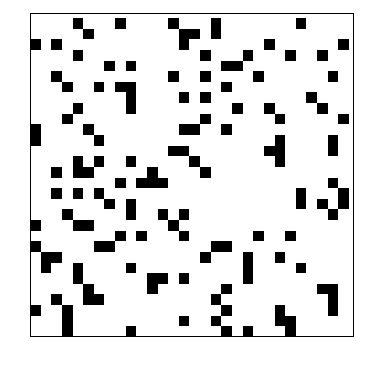

In [8]:
fig=plt.figure(figsize=(6,5))
plt.subplots_adjust(bottom=0.05, left=0.05, top=0.95)
ax=plt.subplot(111)
plt.imshow(W_orig, cmap="binary")
#plt.colorbar()
plt.axis("off")
plt.axhline(-0.5, color="k")
plt.axhline(30, color="k")
plt.axvline(-0.5, color="k")
plt.axvline(30, color="k")
plt.axis([-0.5, 30, -.5, 30])
plt.show()
fig.savefig("W_orig.pdf", dpi=200)

In [ ]:
### time series with noise

In [9]:
x_all_wo=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01wo_noise_I{}.mat".format(isim))["x_all"]
x_all_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01w_noise_I{}.mat".format(isim))["x_all"]


[29  0  4]


<Figure size 432x288 with 0 Axes>

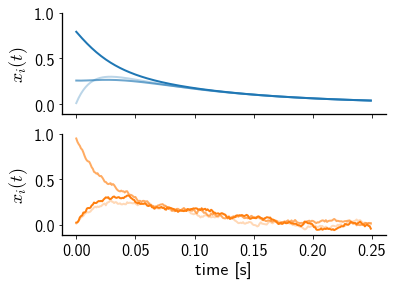

In [27]:
Tmax=250
Nseries=3
dt=1e-3
time=np.arange(Tmax)*dt
alphas=np.linspace(0.3, 1, Nseries)
idxs=np.random.choice(x_all_wo.shape[0], Nseries, replace=False)
print(idxs)
fig=plt.figure()

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust( bottom=0.18, top=0.95, left=0.15)
for i in range(Nseries):
    ax1.plot(time,x_all_wo[idxs[i],:Tmax].T, color="C0", alpha=alphas[i])
    ax2.plot(time,x_all_w[idxs[i],:Tmax].T,  color="C1", alpha=alphas[i])
plt.xlabel("time [s]")
ax1.set_ylabel("$x_i(t)$")
ax2.set_ylabel("$x_i(t)$")
plt.show()
fig.savefig("timeseries.pdf", dpi=200)

In [64]:
## reconstructed connectivity matrices
W_all_wo=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_wo_noise_nextstepalg.mat")["all_dfs"][isim]
W_all_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_w_noise_nextstepalg.mat")["all_dfs"][isim]
auc_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_w_noise_nextstepalg.mat")["all_AUCS"]

In [66]:
auc_w

array([[0.96137382],
       [0.96157993],
       [0.95883051],
       [0.96797442],
       [0.9534759 ],
       [0.94370867],
       [0.95965345],
       [0.96323721],
       [0.95315789],
       [0.9467367 ],
       [0.96281541],
       [0.9599851 ],
       [0.9701393 ],
       [0.94309203],
       [0.96711347],
       [0.95081069],
       [0.96648014],
       [0.95581556],
       [0.93309302],
       [0.95111915],
       [0.95651455],
       [0.956878  ],
       [0.96272624],
       [0.97038625],
       [0.94655717],
       [0.96315586],
       [0.9705596 ],
       [0.94532998],
       [0.95743251],
       [0.95773464],
       [0.95832274],
       [0.95989039],
       [0.96206963],
       [0.95476182],
       [0.97719778],
       [0.95435608],
       [0.95051624],
       [0.9548703 ],
       [0.96062059],
       [0.95008628],
       [0.94768006],
       [0.96527974],
       [0.95438029],
       [0.96156571],
       [0.95111006],
       [0.9684928 ],
       [0.95077344],
       [0.969

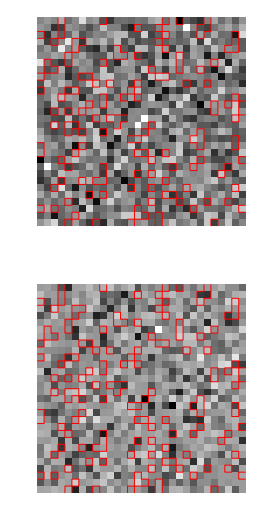

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(4.5,9))

ax1.axis("off")
image = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image[1:-1, 1:-1] = W_orig
image2 = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image2[1:-1, 1:-1] = W_all_wo
f = lambda x,y: image[int(y),int(x) ]
g = np.vectorize(f)
x = np.linspace(0,image.shape[1], image.shape[1]*100)
y = np.linspace(0,image.shape[0], image.shape[0]*100)
X, Y= np.meshgrid(x[:-1],y[:-1])
Z = g(X[:-1],Y[:-1])

ax1.imshow(image2[::-1], origin="lower", interpolation="none", cmap="gray_r")
ax1.contour(Z[::-1], [0.5], colors='r', linewidths=[1], 
            extent=[0-0.5, x[:-1].max()-0.5,0-0.5, y[:-1].max()-0.5])

#with noise
ax2.axis("off")
image = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image[1:-1, 1:-1] = W_orig
image2 = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image2[1:-1, 1:-1] = W_all_w
f = lambda x,y: image[int(y),int(x) ]
g = np.vectorize(f)
x = np.linspace(0,image.shape[1], image.shape[1]*100)
y = np.linspace(0,image.shape[0], image.shape[0]*100)
X, Y= np.meshgrid(x[:-1],y[:-1])
Z = g(X[:-1],Y[:-1])

ax2.imshow(image2[::-1], origin="lower", interpolation="none", cmap="gray_r")
ax2.contour(Z[::-1], [0.5], colors='r', linewidths=[1], 
            extent=[0-0.5, x[:-1].max()-0.5,0-0.5, y[:-1].max()-0.5])

plt.show()
fig.savefig("reconstructed_conn.pdf", dpi=500)

#### A=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/summary_wo_noise_2palg.mat")

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))